# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [40]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [41]:
import numpy as np

In [42]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [43]:
# Number of classes
num_classes = len(np.unique(class_names))
print("Number of classes:", num_classes)

Number of classes: 100


In [44]:
# Shape of trainig and test set:

In [45]:
x_train.shape

(50000, 32, 32, 3)

In [46]:
y_train.shape

(50000, 1)

In [47]:
x_test.shape

(10000, 32, 32, 3)

In [48]:
y_test.shape

(10000, 1)

In [49]:
# dimension of image - The above codes for x show the dimension of the images are 32 (height) x 32 (width) ,
# each images with 3 colour component


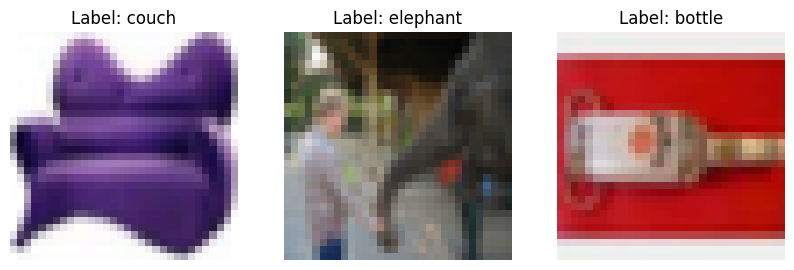

In [50]:
# show examples of the image
import matplotlib.pyplot as plt


# Generate 3 random image example from train set
random_indices = np.random.choice(x_train.shape[0], size=3, replace=False)

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Create a figure with 3 subplots

for i, idx in enumerate(random_indices):
    image = x_train [idx]
    label = y_train[idx][0]  # Get the label for the image

    # Display the image and its label
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {class_names[label]}")  # Use class_names for label
    axes[i].axis('off')  # Turn off axis ticks

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [51]:
# Normalize the image
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [52]:
# Convert the labels to one-hot encoded vectors and test before and after

from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')



Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [53]:
 # split the training set into training and validation sets with 20% for validation

 from sklearn.model_selection import train_test_split


x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=123)

In [54]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [55]:
# CNN architecture

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # 32 filters # input layers

    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), # flattern to form 1D to fit the later dense layer

    layers.Dense(128, activation='relu'),  # Hidden layer 1 with 128 units
    layers.Dense(64, activation='relu'),   # Hidden layer 2
    layers.Dense(100, activation='softmax') # output layer
])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,188 (1.26 MB)

 Trainable params: 329,188 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______ **'categorical_crossentropy' because it is a multi-class classification and the output layer use Softmax Activation**
- <b>Optimizer:</b> ______'Adam', it can automatically adjust the step size for each weight and bias during training, leading to faster convergence and better performance. We can also adjust its momentum  to help navigate more efficiently

In [56]:
# Complie the model

model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='adam', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)



## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [57]:
# Your Code Here

# Training the model
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data = (x_val, y_val),
                    shuffle=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0569 - loss: 4.2387 - val_accuracy: 0.1649 - val_loss: 3.5015
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2004 - loss: 3.3279 - val_accuracy: 0.2353 - val_loss: 3.0858
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2682 - loss: 2.9445 - val_accuracy: 0.2836 - val_loss: 2.8640
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3165 - loss: 2.6859 - val_accuracy: 0.3044 - val_loss: 2.7888
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3585 - loss: 2.5015 - val_accuracy: 0.3281 - val_loss: 2.7212
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3863 - loss: 2.3502 - val_accuracy: 0.3388 - val_loss: 2.6398
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4112 - loss: 2.2287 - val_accuracy: 0.3410 - val_loss: 2.6532
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4417 - loss: 2.1141 -

In [58]:
print(history.history.keys()) # showing columns in the history obejct

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [59]:
# Report accuracy on test set and try out matric
# Print the accuracy

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}") # 4 decimal place

# Calculate and print another metric - Top-5 Accuracy
from tensorflow.keras.metrics import TopKCategoricalAccuracy

top_5_accuracy = TopKCategoricalAccuracy(k=5) # Top 5 accuracy ==shows the % of times the true label was among the model's top 5 predictions.
top_5_accuracy.update_state(y_test, model.predict(x_test))# update it using true labels and prediction
print(f"Test Top-5 Accuracy: {top_5_accuracy.result().numpy():.4f}")



Test Accuracy: 0.3454
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Top-5 Accuracy: 0.6405


Accuracy represents the percentage of correctly classified image in the testset while Top 5 Accuracy **(TopKCategoricalAccuracy)**show the percentage of images in the test set where true label was among the model's tope 5 predicted classes. We select it because this is a mulit -class classfication problem . This metric provide a more nuanced view of the model's performance especaially when the classes are closely related or difficult to distinguish. The value of the metric is 0.63 which means there are 63% of times the true label was among the model's top 5 predictions.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

The result shows there is divergence from the validation accuracy and training data accuracy where shows there might be overfitting happening. The best accuracy is happend when the epoch is 2 and the loss is around 3.

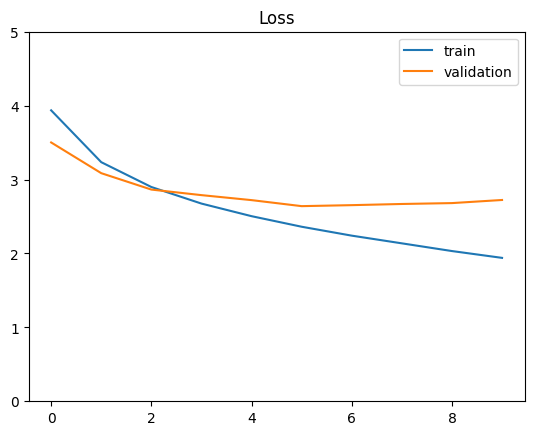

In [61]:
# Plot the training accuracy and validation accuracy with respect to epochs.
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 5)
plt.legend(loc='best')
plt.title('Loss');

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


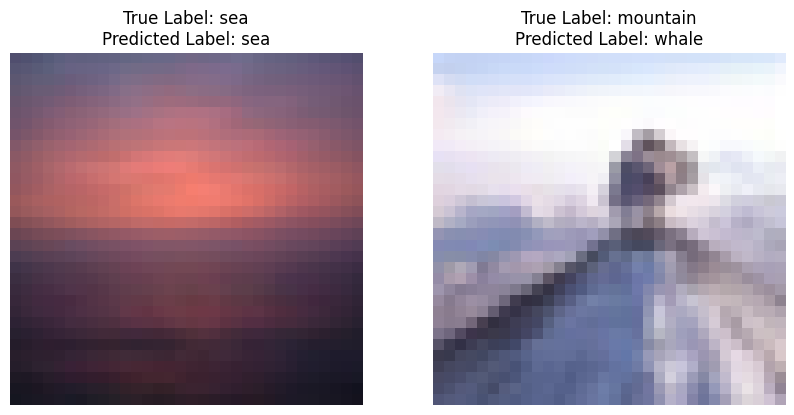

Correctly Classified Image Probabilities:
sea: 0.0000

Incorrectly Classified Image Probabilities:
mountain: 0.0000


In [62]:
# select image

# Get predictions for the test set
predictions = model.predict(x_test)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = np.argmax(y_test, axis=1)

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Select one correctly classified image
correct_index = correct_indices[0]  # You can change the index to select a different image
correct_image = x_test[correct_index]
correct_label = true_labels[correct_index]
correct_probs = predictions[correct_index]

# Select one incorrectly classified image
incorrect_index = incorrect_indices[0]  # You can change the index to select a different image
incorrect_image = x_test[incorrect_index]
incorrect_label = true_labels[incorrect_index]
incorrect_probs = predictions[incorrect_index]

# Plot the images and classification probabilities
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Correctly classified image
axes[0].imshow(correct_image)
axes[0].set_title(f"True Label: {class_names[correct_label]}\nPredicted Label: {class_names[np.argmax(correct_probs)]}")
axes[0].axis('off')

# Incorrectly classified image
axes[1].imshow(incorrect_image)
axes[1].set_title(f"True Label: {class_names[incorrect_label]}\nPredicted Label: {class_names[np.argmax(incorrect_probs)]}")
axes[1].axis('off')

plt.show()

# Print classification probabilities for both images
print("Correctly Classified Image Probabilities:")

print(f"{class_names[correct_label]}: {prob:.4f}")

print("\nIncorrectly Classified Image Probabilities:")

print(f"{class_names[incorrect_label]}: {prob:.4f}")



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [64]:
# enahnced the model with dropout layer

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # 32 filters # input layers

    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), # flattern to form 1D to fit the later dense layer

    layers.Dense(128, activation='relu'),  # Hidden layer 1 with 128 units
    layers.Dropout(0.5),  # Dropout layer added here
    layers.Dense(64, activation='relu'),   # Hidden layer 2
    layers.Dropout(0.3),  # Dropout layer added here
    layers.Dense(100, activation='softmax') # output layer
])

model.summary()

# Complie the model

model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='adam', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

# Training the model
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data = (x_val, y_val),
                    shuffle=True)


# Report accuracy on test set and try out matric
# Print the accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc:.4f}") # 4 decimal place

# Calculate and print another metric - Top-5 Accuracy
from tensorflow.keras.metrics import TopKCategoricalAccuracy

top_5_accuracy = TopKCategoricalAccuracy(k=5) # Top 5 accuracy ==shows the % of times the true label was among the model's top 5 predictions.
top_5_accuracy.update_state(y_test, model.predict(x_test))# update it using true labels and prediction
print(f"Test Top-5 Accuracy: {top_5_accuracy.result().numpy():.4f}")



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,188 (1.26 MB)

 Trainable params: 329,188 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0215 - loss: 4.4828 - val_accuracy: 0.0778 - val_loss: 4.0254
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0710 - loss: 4.0253 - val_accuracy: 0.1429 - val_loss: 3.6538
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1034 - loss: 3.7993 - val_accuracy: 0.1679 - val_loss: 3.4981
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1253 - loss: 3.6610 - val_accuracy: 0.1844 - val_loss: 3.4104
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1447 - loss: 3.5527 - val_accuracy: 0.2117 - val_loss: 3.2642
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1574 - loss: 3.4845 - val_accuracy: 0.2160 - val_loss: 3.2385
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1722 - loss: 3.3989 - val_accuracy: 0.2240 - val_loss: 3.1730
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1810 - loss: 3.3344 

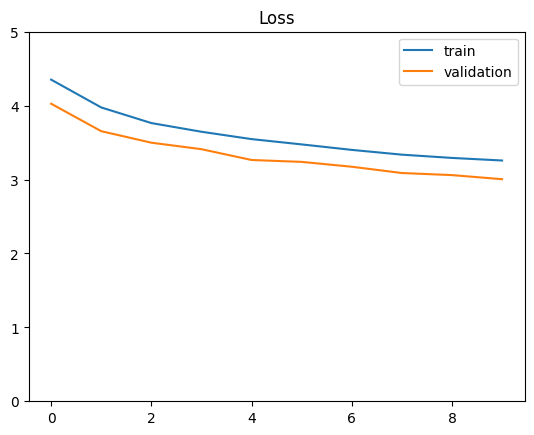

In [65]:
# Plot the training accuracy and validation accuracy with respect to epochs.
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 5)
plt.legend(loc='best')
plt.title('Loss');

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


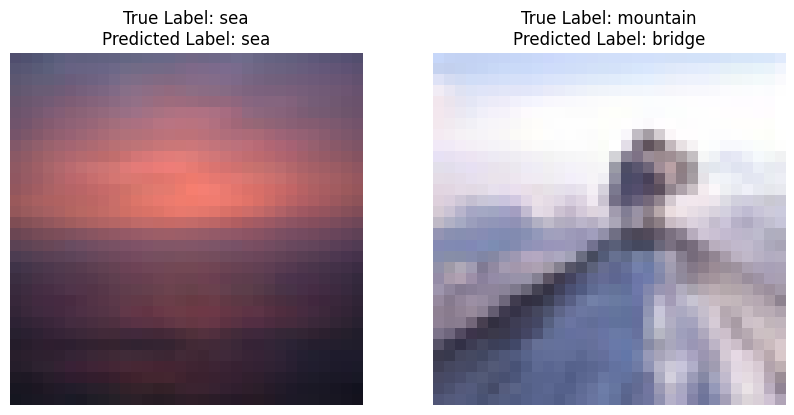

Correctly Classified Image Probabilities:
sea: 0.0005

Incorrectly Classified Image Probabilities:
mountain: 0.0005


In [66]:
# select image

# Get predictions for the test set
predictions = model.predict(x_test)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = np.argmax(y_test, axis=1)

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Select one correctly classified image
correct_index = correct_indices[0]  # You can change the index to select a different image
correct_image = x_test[correct_index]
correct_label = true_labels[correct_index]
correct_probs = predictions[correct_index]

# Select one incorrectly classified image
incorrect_index = incorrect_indices[0]  # You can change the index to select a different image
incorrect_image = x_test[incorrect_index]
incorrect_label = true_labels[incorrect_index]
incorrect_probs = predictions[incorrect_index]

# Plot the images and classification probabilities
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Correctly classified image
axes[0].imshow(correct_image)
axes[0].set_title(f"True Label: {class_names[correct_label]}\nPredicted Label: {class_names[np.argmax(correct_probs)]}")
axes[0].axis('off')

# Incorrectly classified image
axes[1].imshow(incorrect_image)
axes[1].set_title(f"True Label: {class_names[incorrect_label]}\nPredicted Label: {class_names[np.argmax(incorrect_probs)]}")
axes[1].axis('off')

plt.show()

# Print classification probabilities for both images
print("Correctly Classified Image Probabilities:")

print(f"{class_names[correct_label]}: {prob:.4f}")

print("\nIncorrectly Classified Image Probabilities:")

print(f"{class_names[incorrect_label]}: {prob:.4f}")



### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The results are lower compare to the model before enhancement , Accuracy is 0.3 vs 0.2. The performance didn't improve. I believe the dropout layer has made the model not complex enough to capture the underlying pattern in the data. The model is **underfit**  I may try to change the learning rate or optimizer next time instead of adding dropout layer.

In [67]:
# Your Code Here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.